In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets, model_selection, metrics
import h5py
import requests
#import streamlit as st


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets, model_selection, metrics
import h5py
import requests
import streamlit as st


In [3]:
import os
import glob
from IPython.display import Image as IPImage
import pandas as pd             # Pandas
import numpy as np              # NumPy
import matplotlib.pyplot as plt # Matplotlib
import seaborn as sns           # Seaborn
from PIL import Image           # Pillow

# TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

# Keras
from keras.layers import Flatten, Dense, Activation, Dropout
from keras import models, optimizers
from keras.models import Sequential
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import model_from_json
from keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications import DenseNet121
from keras.applications.densenet import DenseNet121, preprocess_input

# scikit-learn
from sklearn.model_selection import train_test_split

In [6]:
train_data = r"C:\Users\91889\Downloads\archive (16)\BreaKHis_v1\BreaKHis_v1\histology_slides\breast"
pd.DataFrame(
    os.listdir(train_data),
    columns=['File Name']
)

,File Name
0,benign
1,malignant


In [7]:
data_paths = []
labels = []

main_dirs = os.listdir(train_data)
for folder_name in main_dirs:
    folder_path = os.path.join(train_data, folder_name)
    files = os.listdir(folder_path)
    for file in files:
        file_path = os.path.join(folder_path, file)
        data_paths.append(file_path)
        labels.append(folder_name)

In [10]:
import os

def count_images_in_breakhis_deep(dataset_path):
    benign_count = 0
    malignant_count = 0

    # Loop through benign and malignant
    for class_name in ['benign', 'malignant']:
        class_path = os.path.join(dataset_path, class_name, 'SOB')  # 'SOB' folder ke andar jaake
        
        if os.path.exists(class_path):
            for subtype in os.listdir(class_path):  # subtype folders
                subtype_path = os.path.join(class_path, subtype)
                if os.path.isdir(subtype_path):
                    for patient_folder in os.listdir(subtype_path):  # patient folders
                        patient_path = os.path.join(subtype_path, patient_folder)
                        if os.path.isdir(patient_path):
                            for magnification_folder in os.listdir(patient_path):  # magnification folders like 40X
                                magnification_path = os.path.join(patient_path, magnification_folder)
                                if os.path.isdir(magnification_path):
                                    image_count = len([
                                        f for f in os.listdir(magnification_path)
                                        if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png')
                                    ])
                                    if class_name == 'benign':
                                        benign_count += image_count
                                    elif class_name == 'malignant':
                                        malignant_count += image_count

    print(f"Total images in benign class: {benign_count}")
    print(f"Total images in malignant class: {malignant_count}")
    print(f"Total images in dataset: {benign_count + malignant_count}")

# Tumhara dataset path
dataset_path = r"C:\Users\91889\Downloads\archive (16)\BreaKHis_v1\BreaKHis_v1\histology_slides\breast"

# Call function
count_images_in_breakhis_deep(dataset_path)


Total images in benign class: 2480
Total images in malignant class: 5429
Total images in dataset: 7909


In [4]:
import os
import shutil
import random

# 📍 Tumhara original dataset path (jahan breast/benign, malignant folders hain)
source_dataset_path = r"C:\Users\91889\Downloads\archive (16)\BreaKHis_v1\BreaKHis_v1\histology_slides\breast"

# 📍 Tumhara naya 40X dataset save hone ka path
output_dataset_path = r"C:\Users\91889\Downloads\BreakHis_40X_Dataset"

# Split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Function to create directories
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Step 1: Loop over 'benign' and 'malignant'
for category in ['benign', 'malignant']:
    category_path = os.path.join(source_dataset_path, category)
    
    for subfolder in os.listdir(category_path):
        subfolder_path = os.path.join(category_path, subfolder)
        
        if os.path.isdir(subfolder_path):
            for patient_folder in os.listdir(subfolder_path):
                patient_path = os.path.join(subfolder_path, patient_folder)
                
                if os.path.isdir(patient_path):
                    # Filter only 40X images
                    images = [img for img in os.listdir(patient_path) if "40X" in img and (img.endswith('.png') or img.endswith('.jpg') or img.endswith('.jpeg'))]
                    
                    # Shuffle images
                    random.shuffle(images)
                    
                    total_images = len(images)
                    train_end = int(total_images * train_ratio)
                    val_end = int(total_images * (train_ratio + val_ratio))
                    
                    # Copy images to respective folders
                    for idx, image_name in enumerate(images):
                        if idx < train_end:
                            split = 'train'
                        elif idx < val_end:
                            split = 'val'
                        else:
                            split = 'test'
                        
                        dest_dir = os.path.join(output_dataset_path, split, category)
                        create_dir(dest_dir)
                        
                        src_image_path = os.path.join(patient_path, image_name)
                        dest_image_path = os.path.join(dest_dir, image_name)
                        
                        shutil.copy(src_image_path, dest_image_path)

print("✅ 40X dataset created successfully at:", output_dataset_path)


✅ 40X dataset created successfully at: C:\Users\91889\Downloads\BreakHis_40X_Dataset


In [14]:
# Function to create directories if not exist
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Ensure top-level folders are created
create_dir(os.path.join(output_dataset_path, 'train'))
create_dir(os.path.join(output_dataset_path, 'val'))
create_dir(os.path.join(output_dataset_path, 'test'))

# Ensure subdirectories for each category (benign, malignant) are created
create_dir(os.path.join(output_dataset_path, 'train', 'benign'))
create_dir(os.path.join(output_dataset_path, 'train', 'malignant'))

create_dir(os.path.join(output_dataset_path, 'val', 'benign'))
create_dir(os.path.join(output_dataset_path, 'val', 'malignant'))

create_dir(os.path.join(output_dataset_path, 'test', 'benign'))
create_dir(os.path.join(output_dataset_path, 'test', 'malignant'))


In [17]:
import os
import shutil

# Path to the original dataset
original_dataset_path = r"C:\Users\91889\Downloads\archive (16)\BreaKHis_v1\BreaKHis_v1\histology_slides\breast"

# Path to the new dataset where images will be organized
output_dataset_path = r"C:\Users\91889\Downloads\BreakHis_40X_Dataset"

# Function to organize the images into train, val, and test folders
def organize_images():
    # Define the target classes and subfolders for train, val, test
    class_names = ['benign', 'malignant']
    split_folders = ['train', 'val', 'test']
    
    # Create the train, val, test folders and class folders inside them
    for split in split_folders:
        for class_name in class_names:
            class_dir = os.path.join(output_dataset_path, split, class_name)
            if not os.path.exists(class_dir):
                os.makedirs(class_dir)

    # Iterate over original dataset subfolders (for 40X, e.g., benign or malignant)
    for class_name in class_names:
        class_path = os.path.join(original_dataset_path, class_name)
        
        # Loop through all tissue types (like SOB, etc.)
        for tissue_type in os.listdir(class_path):
            tissue_path = os.path.join(class_path, tissue_type)
            
            if os.path.isdir(tissue_path):
                # Get all images in the tissue type folder
                image_files = [f for f in os.listdir(tissue_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
                
                # Loop through images and split them into train, val, test
                for i, image in enumerate(image_files):
                    image_path = os.path.join(tissue_path, image)

                    # Logic to split images between train, val, and test
                    if i % 10 == 0:  # Move every 10th image to 'val'
                        dest_folder = os.path.join(output_dataset_path, 'val', class_name, image)
                    elif i % 5 == 0:  # Move every 5th image to 'test'
                        dest_folder = os.path.join(output_dataset_path, 'test', class_name, image)
                    else:
                        dest_folder = os.path.join(output_dataset_path, 'train', class_name, image)

                    # Copy the image to the respective folder
                    shutil.copy(image_path, dest_folder)

# Call the function to organize images
organize_images()


In [5]:
import os
import shutil
import random

# Original dataset folder
original_dataset_dir = r"C:\Users\91889\Downloads\archive (16)\BreaKHis_v1\BreaKHis_v1\histology_slides\breast"

# New dataset folder (train/val/test structure)
base_dir = r"C:\Users\91889\Downloads\BreakHis_Full_Dataset"  # new name since full dataset

# Classes
classes = ['benign', 'malignant']

# Create train/val/test folders
for split in ['train', 'val', 'test']:
    for cls in classes:
        path = os.path.join(base_dir, split, cls)
        os.makedirs(path, exist_ok=True)

# Collect and distribute images
for cls in classes:
    class_path = os.path.join(original_dataset_dir, cls)
    
    all_images = []
    for root, dirs, files in os.walk(class_path):
        for file in files:
            if file.endswith('.png'):
                all_images.append(os.path.join(root, file))
    
    random.shuffle(all_images)
    
    train_split = int(0.7 * len(all_images))
    val_split = int(0.15 * len(all_images))
    
    train_files = all_images[:train_split]
    val_files = all_images[train_split:train_split+val_split]
    test_files = all_images[train_split+val_split:]
    
    # Copy files
    for f in train_files:
        shutil.copy(f, os.path.join(base_dir, 'train', cls))
    for f in val_files:
        shutil.copy(f, os.path.join(base_dir, 'val', cls))
    for f in test_files:
        shutil.copy(f, os.path.join(base_dir, 'test', cls))

print("✅ Full dataset distributed successfully!")


✅ Full dataset distributed successfully!


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Path to full dataset
dataset_path = r"C:\Users\91889\Downloads\BreakHis_Full_Dataset"

# Image size
IMG_SIZE = (224, 224)

# Step 1: Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Load data
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(dataset_path, 'val'),
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

# Step 3: Build a Powerful CNN Model
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.4),

    # Fully connected
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Step 4: Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 5: Train
history = model.fit(
    train_generator,
    epochs=25,  # 👈 Increase epochs for better accuracy
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Step 6: Evaluate
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Save model
model.save('breast_cancer_best_cnn_model.h5')


Found 5536 images belonging to 2 classes.
Found 1186 images belonging to 2 classes.
Found 1187 images belonging to 2 classes.
Epoch 1/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 34s/step - accuracy: 0.7326 - loss: 0.6553 

C:\Users\91889\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


173/173 ━━━━━━━━━━━━━━━━━━━━ 5887s 34s/step - accuracy: 0.7328 - loss: 0.6548 - val_accuracy: 0.6867 - val_loss: 6.7639
Epoch 2/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 832s 5s/step - accuracy: 0.8212 - loss: 0.4681 - val_accuracy: 0.6875 - val_loss: 7.8937
Epoch 3/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 840s 5s/step - accuracy: 0.8265 - loss: 0.4324 - val_accuracy: 0.7010 - val_loss: 2.2373
Epoch 4/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 774s 4s/step - accuracy: 0.8551 - loss: 0.3826 - val_accuracy: 0.6867 - val_loss: 2.3503
Epoch 5/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 778s 4s/step - accuracy: 0.8541 - loss: 0.3606 - val_accuracy: 0.6926 - val_loss: 1.4630
Epoch 6/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 957s 6s/step - accuracy: 0.8544 - loss: 0.3489 - val_accuracy: 0.7382 - val_loss: 1.0066
Epoch 7/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 944s 5s/step - accuracy: 0.8675 - loss: 0.3353 - val_accuracy: 0.7323 - val_loss: 1.2466
Epoch 8/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 1829s 11s/step - accuracy: 0.8726 - loss: 0.3126 - val_accuracy: 0

Test Accuracy: 82.52%


In [8]:
model.save('breast_cancer_cnn_model.h5')


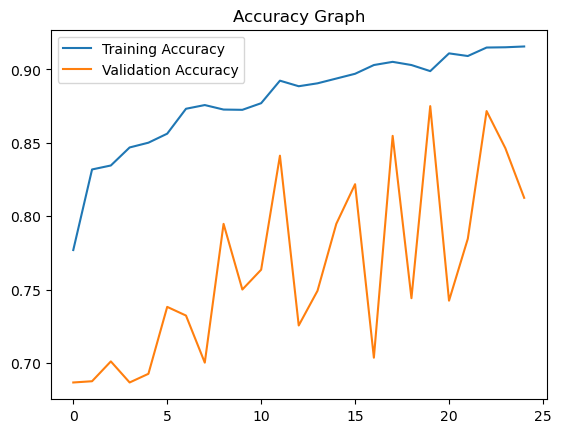

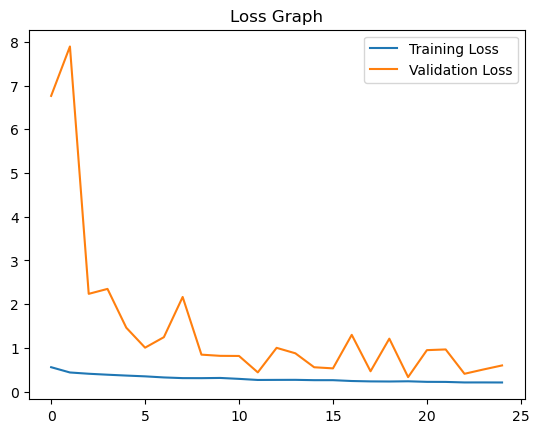

In [9]:
import matplotlib.pyplot as plt

# Accuracy Graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Graph')
plt.show()

# Loss Graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Graph')
plt.show()


In [10]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
Y_pred = model.predict(test_generator)
y_pred = np.where(Y_pred > 0.5, 1, 0)

# True labels
y_true = test_generator.classes

# Confusion Matrix
print(confusion_matrix(y_true, y_pred))

# Classification Report
print(classification_report(y_true, y_pred))


38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 983ms/step
[[ 56 316]
 [168 647]]
              precision    recall  f1-score   support

           0       0.25      0.15      0.19       372
           1       0.67      0.79      0.73       815

    accuracy                           0.59      1187
   macro avg       0.46      0.47      0.46      1187
weighted avg       0.54      0.59      0.56      1187



38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 787ms/step


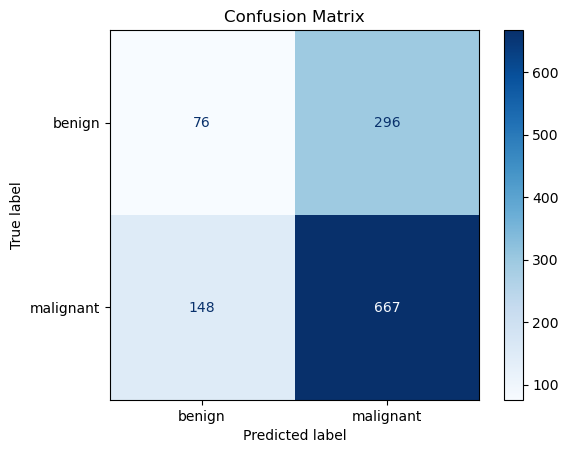

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
Y_pred = model.predict(test_generator)
y_pred = np.where(Y_pred > 0.5, 1, 0)

# True labels
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


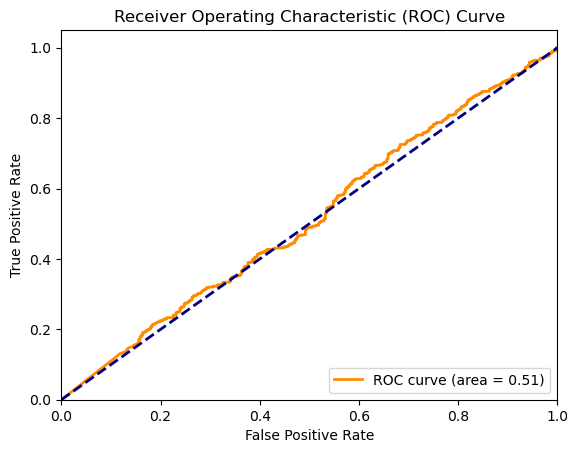

In [12]:
from sklearn.metrics import roc_curve, auc

# ROC Curve ke liye probability chahiye (Y_pred)
fpr, tpr, thresholds = roc_curve(y_true, Y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


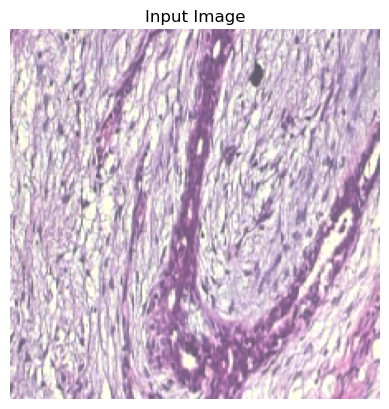

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
Prediction: Benign Tumor 🙂


In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 1. Model load karo
model = tf.keras.models.load_model('breast_cancer_cnn_model.h5')

# 2. Image ka path
img_path = r"C:\Users\91889\Downloads\BreakHis_Full_Dataset\test\benign\SOB_B_F-14-14134-100-023.png"  # <-- yaha apna image path do

# 3. Image load karo
img = image.load_img(img_path, target_size=(224, 224))

# 4. Show image
plt.imshow(img)
plt.axis('off')  # hide axis
plt.title('Input Image')
plt.show()

# 5. Image ko array mein convert karo
img_array = image.img_to_array(img)

# 6. Normalize (0-1 range)
img_array = img_array / 255.0

# 7. Batch dimension add karo
img_array = np.expand_dims(img_array, axis=0)

# 8. Prediction
prediction = model.predict(img_array)

# 9. Result decode
if prediction[0][0] > 0.5:
    print("Prediction: Malignant Tumor 😟")
else:
    print("Prediction: Benign Tumor 🙂")


In [19]:
print(f"Confidence: {prediction[0][0]*100:.2f}%")


Confidence: 0.10%


In [15]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Data Augmentation + Rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=20,
    validation_split=0.2   # 20% validation
)

# ✅ Train Generator
train_generator = train_datagen.flow_from_directory(
    r'C:\Users\91889\Downloads\BreakHis_Full_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


# ✅ Validation Generator
val_generator = train_datagen.flow_from_directory(
    r'C:\Users\91889\Downloads\BreakHis_Full_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 6328 images belonging to 3 classes.
Found 1581 images belonging to 3 classes.


In [14]:

# ✅ 1. Libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from sklearn.model_selection import train_test_split
import numpy as np
import os
from glob import glob
from sklearn.utils import shuffle

# ✅ 2. Paths
data_dir = r"C:\Users\91889\Downloads\BreakHis_Full_Dataset"  # <-- change this

# ✅ 3. Data Generator (with Augmentation)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224), 
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# ✅ 4. Model (DenseNet121)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# ❌ Freeze all base layers
for layer in base_model.layers:
    layer.trainable = False

# ✅ Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # binary classification

model = Model(inputs=base_model.input, outputs=x)

# ✅ Compile
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# ✅ 5. Train Base Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25
)

# ✅ 6. Fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Re-compile with lower learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fine-tune
fine_tune_epochs = 10
total_epochs = 25 + fine_tune_epochs

history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=total_epochs,
    initial_epoch=25
)


# ✅ 7. Save model
model.save('breakhis_densenet121_finetuned.h5')


Found 6328 images belonging to 3 classes.
Found 1581 images belonging to 3 classes.
Epoch 1/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 585s 3s/step - accuracy: 0.6326 - loss: 0.2462 - val_accuracy: 0.7002 - val_loss: 0.0328
Epoch 2/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 739s 4s/step - accuracy: 0.7010 - loss: -0.0087 - val_accuracy: 0.7002 - val_loss: 0.0254
Epoch 3/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 2714s 14s/step - accuracy: 0.6963 - loss: 0.0871 - val_accuracy: 0.7002 - val_loss: 0.0182
Epoch 4/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 554s 3s/step - accuracy: 0.7008 - loss: 0.0552 - val_accuracy: 0.7002 - val_loss: 0.0083
Epoch 5/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 545s 3s/step - accuracy: 0.7019 - loss: -0.0847 - val_accuracy: 0.7002 - val_loss: 0.0018
Epoch 6/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 5607s 28s/step - accuracy: 0.7010 - loss: -0.0353 - val_accuracy: 0.7002 - val_loss: -0.0136
Epoch 7/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 524s 3s/step - accuracy: 0.6976 - loss: -0.1046 - val_accuracy: 0.7002 - val_loss: -0.0037
Epo

In [16]:
# ✅ 8. Evaluate model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.6791 - loss: 0.0811
Validation Loss: -0.0686
Validation Accuracy: 0.7002


In [17]:
# Training ke baad best validation accuracy
best_val_acc = max(history_finetune.history['val_accuracy'])
print(f"Best Validation Accuracy During Training: {best_val_acc:.4f}")


Best Validation Accuracy During Training: 0.6996


In [20]:
# Get true labels
Y_true = val_generator.classes

# Predict probabilities
Y_pred_probs = model.predict(val_generator, verbose=1)

# Convert probabilities to binary predictions
Y_pred = (Y_pred_probs > 0.5).astype(int).ravel()


50/50 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step


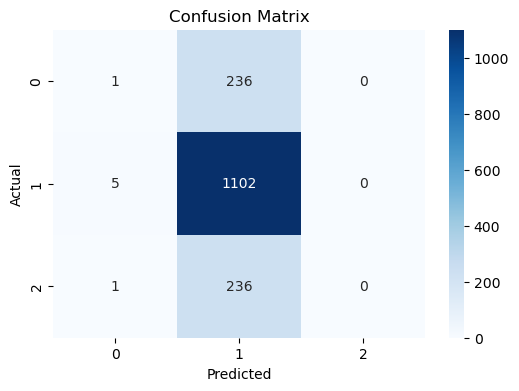


Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.00      0.01       237
           1       0.70      1.00      0.82      1107
           2       0.00      0.00      0.00       237

    accuracy                           0.70      1581
   macro avg       0.28      0.33      0.28      1581
weighted avg       0.51      0.70      0.58      1581



C:\Users\91889\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91889\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91889\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_true, Y_pred))


In [24]:
import numpy as np
import os
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# Path to your dataset
data_dir = r"C:\Users\91889\Downloads\BreakHis_Full_Dataset"  # <-- Change if needed

# Data Generator for Feature Extraction (NO augmentation)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=False
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 6328 images belonging to 3 classes.
Found 1581 images belonging to 3 classes.


In [26]:
# Load DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# GlobalAveragePooling2D lagana
feature_extractor = Model(inputs=base_model.input, outputs=tf.keras.layers.GlobalAveragePooling2D()(base_model.output))

# Freeze the model (no training)
feature_extractor.trainable = False


In [27]:
# Extract features
X_train_features = feature_extractor.predict(train_generator, verbose=1)
X_val_features = feature_extractor.predict(val_generator, verbose=1)

# Get true labels
y_train = train_generator.classes
y_val = val_generator.classes

print("Train features shape:", X_train_features.shape)
print("Validation features shape:", X_val_features.shape)


C:\Users\91889\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


198/198 ━━━━━━━━━━━━━━━━━━━━ 503s 3s/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step
Train features shape: (6328, 1024)
Validation features shape: (1581, 1024)


Random Forest Accuracy: 0.7001897533206831


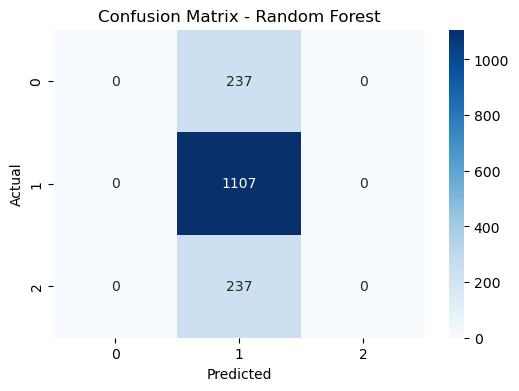


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       237
           1       0.70      1.00      0.82      1107
           2       0.00      0.00      0.00       237

    accuracy                           0.70      1581
   macro avg       0.23      0.33      0.27      1581
weighted avg       0.49      0.70      0.58      1581



C:\Users\91889\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91889\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91889\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# Predict
y_pred = rf_model.predict(X_val_features)

# Accuracy
acc_rf = accuracy_score(y_val, y_pred)
print("Random Forest Accuracy:", acc_rf)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_pred))


SVM Accuracy: 0.7001897533206831


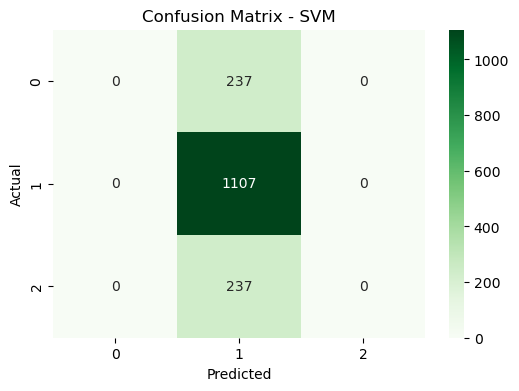


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       237
           1       0.70      1.00      0.82      1107
           2       0.00      0.00      0.00       237

    accuracy                           0.70      1581
   macro avg       0.23      0.33      0.27      1581
weighted avg       0.49      0.70      0.58      1581



C:\Users\91889\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91889\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91889\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# SVM
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_features, y_train)

# Predict
y_pred_svm = svm_model.predict(X_val_features)

# Accuracy
acc_svm = accuracy_score(y_val, y_pred_svm)
print("SVM Accuracy:", acc_svm)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_pred_svm))


C:\Users\91889\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6786843769765971


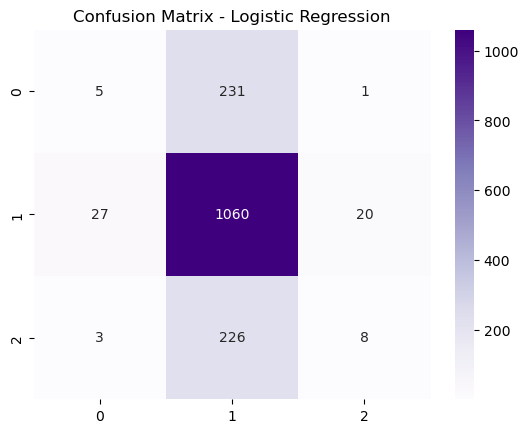

              precision    recall  f1-score   support

           0       0.14      0.02      0.04       237
           1       0.70      0.96      0.81      1107
           2       0.28      0.03      0.06       237

    accuracy                           0.68      1581
   macro avg       0.37      0.34      0.30      1581
weighted avg       0.55      0.68      0.58      1581



In [46]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_features, y_train)

# Predict
y_pred_lr = lr_model.predict(X_val_features)

# Accuracy
acc_lr =  accuracy_score(y_val, y_pred_lr)
print("Logistic Regression Accuracy:",acc_lr)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Classification Report
print(classification_report(y_val, y_pred_lr))


Decision Tree Accuracy: 0.5464895635673624


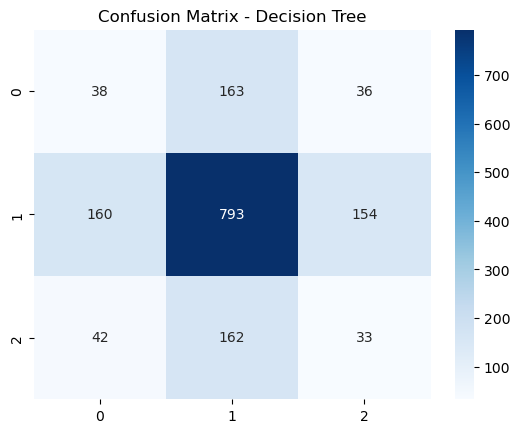

              precision    recall  f1-score   support

           0       0.16      0.16      0.16       237
           1       0.71      0.72      0.71      1107
           2       0.15      0.14      0.14       237

    accuracy                           0.55      1581
   macro avg       0.34      0.34      0.34      1581
weighted avg       0.54      0.55      0.54      1581



In [45]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_features, y_train)

# Predict
y_pred_dt = dt_model.predict(X_val_features)

# Accuracy
acc_dt = accuracy_score(y_val, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Classification Report
print(classification_report(y_val, y_pred_dt))


C:\Users\91889\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [02:53:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7001897533206831


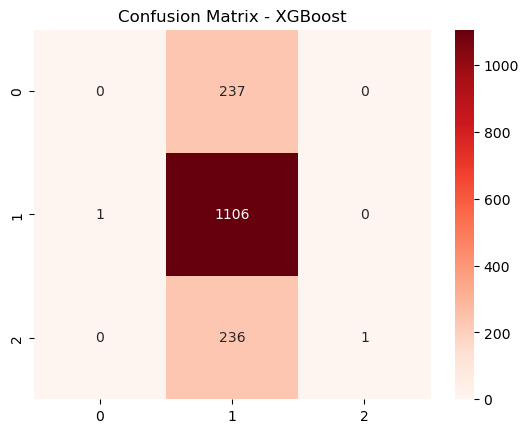

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       237
           1       0.70      1.00      0.82      1107
           2       1.00      0.00      0.01       237

    accuracy                           0.70      1581
   macro avg       0.57      0.33      0.28      1581
weighted avg       0.64      0.70      0.58      1581



In [43]:
from xgboost import XGBClassifier

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_features, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_val_features)

# Accuracy
acc_xgb = accuracy_score(y_val, y_pred_xgb)
print("XGBoost Accuracy:",acc_xgb )

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Classification Report
print(classification_report(y_val, y_pred_xgb))


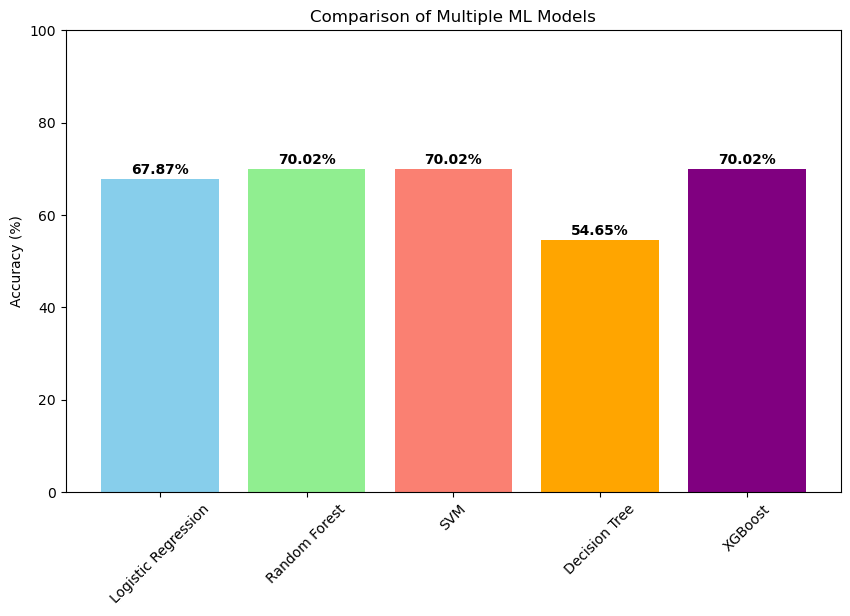

In [48]:
import matplotlib.pyplot as plt

# ✅ Model Names (without KNN)
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree', 'XGBoost']

# ✅ Accuracies of the models (replace these with your actual model accuracies)
accuracies = [acc_lr * 100, acc_rf * 100, acc_svm * 100, acc_dt * 100, acc_xgb * 100]  # Multiply by 100 for percentage

# ✅ Plot
plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple'])
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Multiple ML Models')
plt.ylim(0, 100)  # Accuracy percentage scale
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [49]:
import pandas as pd

# ✅ Model names
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree', 'XGBoost']

# ✅ Their corresponding accuracies (replace these with your real accuracies)
accuracies = [acc_lr * 100, acc_rf * 100, acc_svm * 100, acc_dt * 100, acc_xgb * 100]

# ✅ Create a DataFrame
accuracy_table = pd.DataFrame({
    'Model': models,
    'Accuracy (%)': accuracies
})

# ✅ Display the table
print(accuracy_table)


                 Model  Accuracy (%)
0  Logistic Regression     67.868438
1        Random Forest     70.018975
2                  SVM     70.018975
3        Decision Tree     54.648956
4              XGBoost     70.018975



🔵 Model Accuracy Table:
                 Model  Accuracy (%)
0            CNN Model     82.520000
1  Logistic Regression     67.868438
2        Random Forest     70.018975
3                  SVM     70.018975
4        Decision Tree     54.648956
5              XGBoost     70.018975


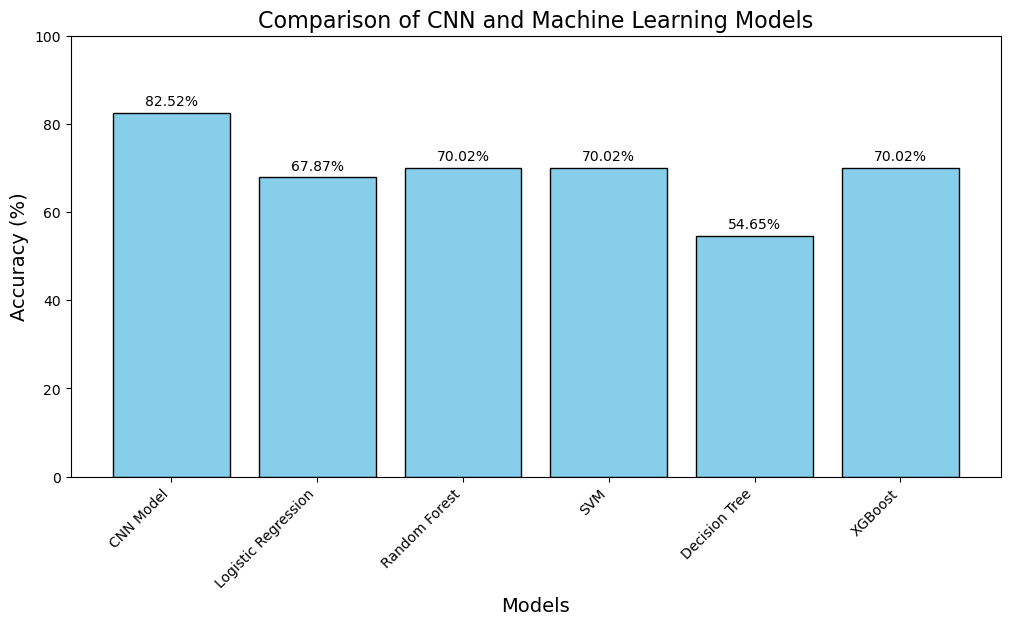

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Models and Their Correct Accuracies
models = [
    'CNN Model',
    'Logistic Regression',
    'Random Forest',
    'SVM',
    'Decision Tree',
    'XGBoost'
]

accuracies = [
    82.52,  # CNN Model
    67.868438,  # Logistic Regression
    70.018975,  # Random Forest
    70.018975,  # SVM
    54.648956,  # Decision Tree
    70.018975   # XGBoost
]

# ✅ Create a Table
accuracy_table = pd.DataFrame({
    'Model': models,
    'Accuracy (%)': accuracies
})

print("\n🔵 Model Accuracy Table:")
print(accuracy_table)

# ✅ Plotting the Bar Graph
plt.figure(figsize=(12,7))
bars = plt.bar(models, accuracies, color='skyblue', edgecolor='black')
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Comparison of CNN and Machine Learning Models', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

# Accuracy value on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

# ✅ Adjust margin
plt.subplots_adjust(bottom=0.25)

plt.show()



🔵 Model Accuracy Table:
                 Model  Accuracy (%)
0            CNN Model     82.520000
1    DenseNet121 Model     70.020000
2  Logistic Regression     67.868438
3        Random Forest     70.018975
4                  SVM     70.018975
5        Decision Tree     54.648956
6              XGBoost     70.018975


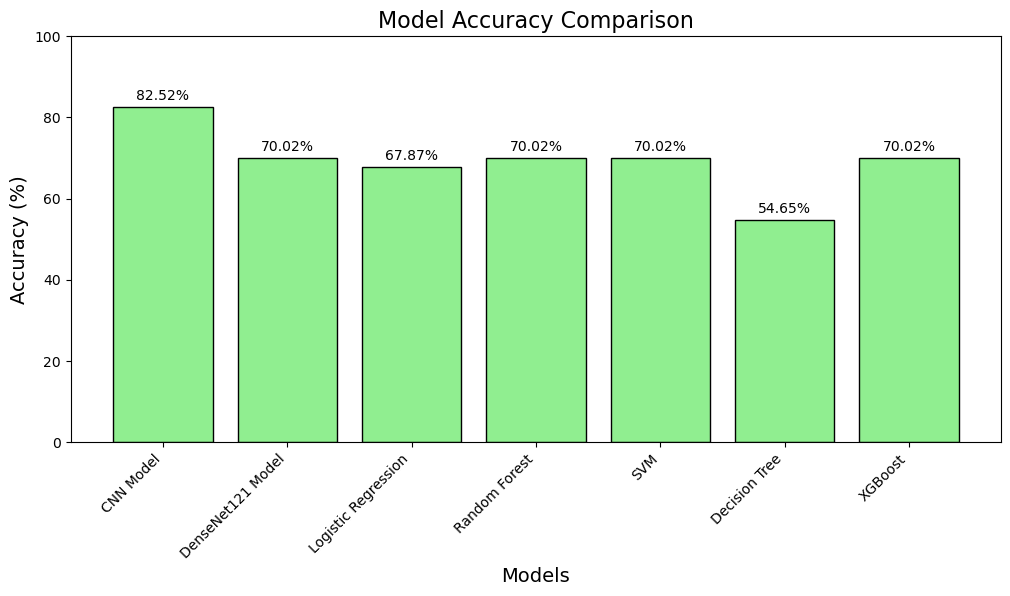

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Models and Accuracies
models = [
    'CNN Model',
    'DenseNet121 Model',
    'Logistic Regression',
    'Random Forest',
    'SVM',
    'Decision Tree',
    'XGBoost'
]

accuracies = [
    82.52,         # CNN
    70.02,          # DenseNet121 (temporary placeholder, tum apni original daal lena)
    67.868438,     # Logistic Regression
    70.018975,     # Random Forest
    70.018975,     # SVM
    54.648956,     # Decision Tree
    70.018975      # XGBoost
]

# ✅ Create Table
accuracy_table = pd.DataFrame({
    'Model': models,
    'Accuracy (%)': accuracies
})

print("\n🔵 Model Accuracy Table:")
print(accuracy_table)

# ✅ Plotting Bar Graph
plt.figure(figsize=(12,7))
bars = plt.bar(models, accuracies, color='lightgreen', edgecolor='black')
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

# Accuracy values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

# ✅ Adjust margins
plt.subplots_adjust(bottom=0.3)

plt.show()


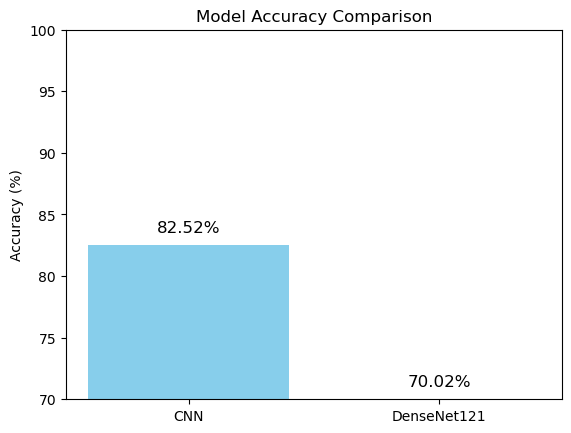

In [56]:
import matplotlib.pyplot as plt

models = ['CNN', 'DenseNet121']
accuracies = [82.52, 70.02]  # example values (%)

plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(70, 100)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc:.2f}%', ha='center', fontsize=12)
plt.show()


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


# Path to full dataset
dataset_path = r"C:\Users\91889\Downloads\BreakHis_Full_Dataset"

# Image size
IMG_SIZE = (224, 224)

# Step 1: Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Load data
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(dataset_path, 'val'),
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

# Step 3: Build a Powerful CNN Model
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.4),

    # Fully connected
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Step 4: Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('breast_cancer_best_cnn_model.keras', monitor='val_accuracy', save_best_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


# Step 5: Train with Callbacks
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[early_stop, checkpoint, lr_reduce]
)


# Step 6: Evaluate
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Save model
model.save('breast_cancer_best_cnn_model.keras')


Found 5536 images belonging to 2 classes.
Found 1186 images belonging to 2 classes.
Found 1187 images belonging to 2 classes.


C:\Users\91889\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7449 - loss: 0.6305

C:\Users\91889\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


173/173 ━━━━━━━━━━━━━━━━━━━━ 900s 5s/step - accuracy: 0.7450 - loss: 0.6300 - val_accuracy: 0.6858 - val_loss: 10.9294 - learning_rate: 1.0000e-04
Epoch 2/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 869s 5s/step - accuracy: 0.8231 - loss: 0.4530 - val_accuracy: 0.6867 - val_loss: 12.9044 - learning_rate: 1.0000e-04
Epoch 3/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 843s 5s/step - accuracy: 0.8366 - loss: 0.4188 - val_accuracy: 0.7660 - val_loss: 5.5485 - learning_rate: 1.0000e-04
Epoch 4/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 880s 5s/step - accuracy: 0.8424 - loss: 0.4003 - val_accuracy: 0.8446 - val_loss: 0.7849 - learning_rate: 1.0000e-04
Epoch 5/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 785s 4s/step - accuracy: 0.8486 - loss: 0.3785 - val_accuracy: 0.8294 - val_loss: 0.6189 - learning_rate: 1.0000e-04
Epoch 6/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 749s 4s/step - accuracy: 0.8487 - loss: 0.3735 - val_accuracy: 0.8142 - val_loss: 0.7367 - learning_rate: 1.0000e-04
Epoch 7/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 754s 4s/step - accuracy: 0.

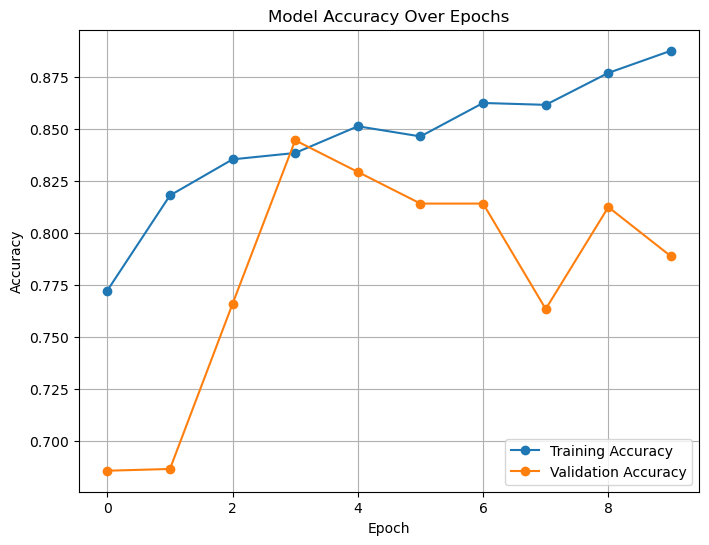

In [4]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


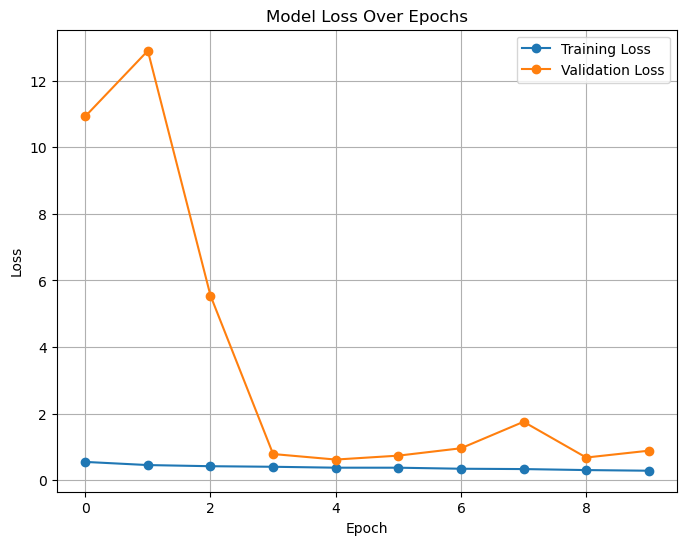

In [5]:
# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6244 - loss: 0.7687

C:\Users\91889\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.6247 - loss: 0.7676 - val_accuracy: 0.6187 - val_loss: 0.6622
Epoch 2/10
 1/75 ━━━━━━━━━━━━━━━━━━━━ 1:07 915ms/step - accuracy: 0.5938 - loss: 0.6973

C:\Users\91889\anaconda3\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
